### Computational Methods - Assignment 1

### 1. Solve the following tridiagonal system of equations using Thomas rule/ algorithm

2x − y = 0  
−x + 2y − z = 0  
−y + 2z − u = 0  
−z + 2u = 1

In [1]:
import numpy as np

# tridiagonal arrays
a = [0, -1, -1, -1]   # sub-diagonal 
b = [2, 2, 2, 2]      # main diagonal
c = [-1, -1, -1, 0]   # super-diagonal 
d = [0, 0, 0, 1]      # right-hand side

n = 4

# forward sweeping
c1_dash = c[0] / b[0]
d1_dash = d[0] / b[0]
c_prev_dash = c1_dash
d_prev_dash = d1_dash

modified_c_d = {
    0: {'ci_dash': c1_dash, 'di_dash': d1_dash}
}
for i in range(1, n): # for i =2,3,4
    ci_dash = c[i] / (b[i] - a[i] * c_prev_dash)
    di_dash = (d[i] - a[i] * d_prev_dash) / (b[i] - a[i] * c_prev_dash)
    modified_c_d[i] ={'ci_dash': ci_dash, 'di_dash': di_dash}
    c_prev_dash = ci_dash
    d_prev_dash = di_dash

# backward substitution
x = np.zeros(n)
x[-1] = d_prev_dash 
for i in range(n - 2, -1, -1):
    di_dash = modified_c_d[i ]['di_dash']
    ci_dash = modified_c_d[i]['ci_dash']
    xi_plus_1 = x[i + 1]
    x[i] = di_dash - ci_dash * xi_plus_1


# print the solution
print("Solution of the tridiagonal system:")
for i in range(n):
    print(f"x_{i+1} = {x[i]:.3f}")



Solution of the tridiagonal system:
x_1 = 0.200
x_2 = 0.400
x_3 = 0.600
x_4 = 0.800


### 2. Solve the linear system 𝐴𝑥 = 𝑏 given by   

### 2. Solve the linear system 𝐴𝑥 = 𝑏 given by   

**4𝑥₁ + 3𝑥₂ = 24**  
**3𝑥₁ + 4𝑥₂ − 𝑥₃ = 30**  
**−𝑥₂ + 4𝑥₃ = −24**

has the solution (3, 4, −5). With 𝑥(0) = (0; 0; 0)ᵗ in both Gauss-Seidel and Relaxation methods, and  
𝜔 = 1.25 in relaxation method, Gauss-Seidel method requires 32 iterations and relaxation method  
requires 14 iterations to accurate to seven decimal places.

**Solve this from Gauss-Seidel method and Relaxation method accurate to 3 decimal places.**

In [2]:
import numpy as np

def gauss_seidel_manual(
    A: np.ndarray,
    b: np.ndarray,
    x_0: np.ndarray,
    tol: float = 1e-6,
    max_iter: int = 50
) -> np.ndarray:
    x = x_0.astype(float).copy()
    n: int = len(b)

    for itr in range(1, max_iter + 1):
        x_old: np.ndarray = x.copy()

        # --- main Gauss‑Seidel sweep -----------------------------
        for i in range(n):
            sum_left: float  = np.dot(A[i, :i],    x[:i])      # uses freshly updated entries
            sum_right: float = np.dot(A[i, i+1:], x_old[i+1:]) # uses old (not‑yet‑updated) entries
            x[i] = (b[i] - sum_left - sum_right) / A[i, i]
        # ---------------------------------------------------------

        # ---  convergence check -------------
        max_change: float = 0.0
        for j in range(n):
            diff: float = abs(x[j] - x_old[j])
            if diff > max_change:
                max_change = diff

        if max_change < tol:
            print(f"Converged after {itr} iterations (max Δ = {max_change:.3e}).")
            return x

    print("Did not converge within the maximum number of iterations.")
    return x

def relaxation_method(
    A: np.ndarray,
    b: np.ndarray,
    x_0: np.ndarray,
    omega: float = 1.0,
    tol: float = 1e-6,
    max_iter: int = 50
) -> np.ndarray:
    x = x_0.astype(float).copy()
    n: int = len(b)

    for itr in range(1, max_iter + 1):
        x_old: np.ndarray = x.copy()

        # --- main relaxation sweep -----------------------------
        for i in range(n):
            sum_left: float  = np.dot(A[i, :i],    x[:i])      # uses freshly updated entries
            sum_right: float = np.dot(A[i, i+1:], x_old[i+1:]) # uses old (not‑yet‑updated) entries
            x[i] = (b[i] - sum_left - sum_right) / A[i, i]
            x[i] = (1 - omega) * x_old[i] + omega * x[i]
        # ---------------------------------------------------------

        # ---  convergence check -------------
        max_change: float = 0.0
        for j in range(n):
            diff: float = abs(x[j] - x_old[j])
            if diff > max_change:
                max_change = diff

        if max_change < tol:
            print(f"Converged after {itr} iterations (max Δ = {max_change:.3e}).")
            return x

    print("Did not converge within the maximum number of iterations.")
    return x

# define A and b from given system of equations

A = np.array([
    [4,3,0],
    [3,4,-1],
    [0,-1,4]
])
b = np.array([24,30,-24])

x_0 = np.zeros_like(b) # initial guess
tolerance = 1e-5
max_iterations = 32
# Gauss-Seidel method


gauss_seidel_solution = gauss_seidel_manual(A, b, x_0, tol=1e-6, max_iter=32)

relaxation_solution = relaxation_method(A, b, x_0, omega=1.5, tol=1e-6, max_iter=32)

print("Approximate solution Using Gauss-Seide:", gauss_seidel_solution)
print("Approximate solution Using Relaxation Method:", relaxation_solution)
print("True solution      :", np.array([3.0, 4.0, -5.0]))


Converged after 30 iterations (max Δ = 8.667e-07).
Converged after 25 iterations (max Δ = 5.754e-07).
Approximate solution Using Gauss-Seide: [ 3.00000144  3.9999988  -5.0000003 ]
Approximate solution Using Relaxation Method: [ 2.99999997  4.00000017 -5.00000015]
True solution      : [ 3.  4. -5.]


### 4. Write the theory for the Relaxation, Guss Seidel, and Jacobian iterative methods’ general formulas. Create Python programs using a suitable example

In [6]:
import numpy as np

def jacobi_method(A: np.ndarray, b: np.ndarray, x0: np.ndarray, tol=1e-6, max_iter=1000):
    """
    Solves linear system Ax = b using Jacobi iterative method
    
    Parameters:
        A : numpy.ndarray - Coefficient matrix (n x n)
        b : numpy.ndarray - Right-hand side vector (n)
        x0 : numpy.ndarray - Initial guess (n)
        tol : float - Tolerance for stopping criterion
        max_iter : int - Maximum number of iterations
        
    Returns:
        x : numpy.ndarray - Solution vector
        iters : int - Number of iterations performed
    """
    n = len(b)
    x_old = x0.copy()
    x_new = np.zeros_like(x0)
    
    for iters in range(1, max_iter + 1):
        # Update each component
        for i in range(n):
            sigma = 0.0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x_old[j]
            x_new[i] = (b[i] - sigma) / A[i, i]
        
        # Check convergence using infinity norm
        diff_norm = 0.0
        for i in range(n):
            error = abs(x_new[i] - x_old[i])
            if error > diff_norm:
                diff_norm = error
        
        if diff_norm < tol:
            break
            
        x_old = x_new.copy()
        
    return x_new, iters

def gauss_seidel_method(A, b, x0, tol=1e-6, max_iter=1000):
    """
    Solves linear system Ax = b using Gauss-Seidel iterative method
    
    Parameters same as jacobi_method
    """
    n = len(b)
    x = x0.copy()
    
    for iters in range(1, max_iter + 1):
        diff_norm = 0.0
        
        for i in range(n):
            old_val = x[i]
            sigma = 0.0
            
            # Lower triangular part (already updated)
            for j in range(i):
                sigma += A[i, j] * x[j]
                
            # Upper triangular part (not yet updated)
            for j in range(i + 1, n):
                sigma += A[i, j] * x[j]
                
            x[i] = (b[i] - sigma) / A[i, i]
            
            # Update norm
            error = abs(x[i] - old_val)
            if error > diff_norm:
                diff_norm = error
                
        if diff_norm < tol:
            break
            
    return x, iters

def sor_method(A, b, x0, omega, tol=1e-6, max_iter=1000):
    """
    Solves linear system Ax = b using Successive Over-Relaxation (SOR)
    
    Additional parameter:
        omega : float - Relaxation parameter (1 < ω < 2 for over-relaxation)
    """
    n = len(b)
    x = x0.copy()
    
    for iters in range(1, max_iter + 1):
        diff_norm = 0.0
        
        for i in range(n):
            old_val = x[i]
            sigma = 0.0
            
            # Lower triangular part (already updated)
            for j in range(i):
                sigma += A[i, j] * x[j]
                
            # Upper triangular part (not yet updated)
            for j in range(i + 1, n):
                sigma += A[i, j] * x[j]
                
            # SOR update
            gs_update = (b[i] - sigma) / A[i, i]
            x[i] = (1 - omega) * old_val + omega * gs_update
            
            # Update norm
            error = abs(x[i] - old_val)
            if error > diff_norm:
                diff_norm = error
                
        if diff_norm < tol:
            break
            
    return x, iters

# Examples

A = np.array([
    [10.0, -1.0, 2.0, 0.0],
    [-1.0, 11.0, -1.0, 3.0],
    [2.0, -1.0, 10.0, -1.0],
    [0.0, 3.0, -1.0, 8.0]
])

b = np.array([6.0, 25.0, -11.0, 15.0])
x0 = np.zeros(4)

# Solve with Jacobi
x_jacobi, iter_j = jacobi_method(A, b, x0)
print(f"Jacobi: {x_jacobi} in {iter_j} iterations")

# Solve with Gauss-Seidel
x_gs, iter_gs = gauss_seidel_method(A, b, x0)
print(f"Gauss-Seidel: {x_gs} in {iter_gs} iterations")

# Solve with SOR (ω = 1.1)
x_sor, iter_sor = sor_method(A, b, x0, omega=1.1)
print(f"SOR: {x_sor} in {iter_sor} iterations")

Jacobi: [ 1.00000014  1.99999976 -0.99999982  0.99999975] in 18 iterations
Gauss-Seidel: [ 1.00000004  1.99999999 -1.00000001  1.        ] in 8 iterations
SOR: [ 1.00000005  2.         -1.00000001  1.00000001] in 9 iterations


### 5. Find  the  real  root  of  the  equations:
### 5. Find  the  real  root  of  the  equations:

Solve the following nonlinear system using the fixed point iterative method (correct to 3 decimal places) with initial guesses \( x_0 = 1 \) and \( y_0 = 2 \):

\begin{cases}
f(x, y) = 1 + y^2 - 4x^2 = 0 \\
g(x, y) = 3 + 2x - x^2 - y^2 = 0
\end{cases}


In [4]:
import numpy as np
import math


def fixed_point_solver(x0, y0, tolerance=5e-4, max_iterations=100):
    """
    Solves the nonlinear system using fixed-point iteration:
        f(x, y) = 1 + y^2 - 4x^2 = 0
        g(x, y) = 3 + 2x - x^2 - y^2 = 0

    The system is reformulated as:
        x_{k+1} = sqrt(1 + y_k^2) / 2
        y_{k+1} = sqrt(3 + 2*x_{k+1} - x_{k+1}^2)

    Parameters:
        x0, y0 : float : Initial guesses
        tolerance : float : Convergence threshold
        max_iterations : int : Safety cap for iteration count

    Returns:
        x, y : floats : Approximate solution
    """
    
    # Initial guesses
    current_x = x0
    current_y = y0
    
    for iteration in range(1, max_iterations + 1):
        # Compute next x using the function derived from f(x,y)
        next_x = math.sqrt(1 + current_y ** 2) / 2
        
        # Compute next y using the function derived from g(x,y)
        radicand_y = 3 + 2 * next_x - next_x ** 2
        if radicand_y < 0:
            raise ValueError("Negative square root encountered. Method diverged.")
        
        next_y = math.sqrt(radicand_y)

        # Compute maximum absolute change (infinity norm)
        delta_x = abs(next_x - current_x)
        delta_y = abs(next_y - current_y)
        max_change = max(delta_x, delta_y)

        # Print each iteration
        print(f"Iteration {iteration:2d}: x = {next_x:.6f}, y = {next_y:.6f}, Δ = {max_change:.6f}")

        # Check convergence
        if max_change < tolerance:
            print(f"\nConverged in {iteration} iterations.")
            return next_x, next_y

        # Update variables for next iteration
        current_x, current_y = next_x, next_y

    # If we reach here, convergence was not achieved
    print("Did not converge within the maximum number of iterations.")
    return current_x, current_y

# Example usage:
initial_x = 1.0
initial_y = 2.0
solution_x, solution_y = fixed_point_solver(initial_x, initial_y)

print(f"\nApproximate Solution (3 decimal places): x = {round(solution_x, 3)}, y = {round(solution_y, 3)}")

Iteration  1: x = 1.118034, y = 1.996514, Δ = 0.118034
Iteration  2: x = 1.116475, y = 1.996605, Δ = 0.001559
Iteration  3: x = 1.116516, y = 1.996603, Δ = 0.000041

Converged in 3 iterations.

Approximate Solution (3 decimal places): x = 1.117, y = 1.997


### 6.  Find a real root of the equations 

### 6.  Find a real root of the equations 

Find the real root of the system of equations, correct to 3 decimal places, using the Newton-Raphson Method with initial guesses \( x_0 = y_0 = 2.54951 \):

\begin{cases}
x^2 - y^2 = 3 \\
x^2 + y^2 = 13
\end{cases}


In [5]:
import numpy as np

def f(x, y):
    return x**2 - y**2 - 3

def g(x, y):
    return x**2 + y**2 - 13

def df_dx(x, y):
    return 2 * x  # ∂f/∂x

def df_dy(x, y):
    return -2 * y  # ∂f/∂y

def dg_dx(x, y):
    return 2 * x  # ∂g/∂x

def dg_dy(x, y):
    return 2 * y  # ∂g/∂y

def newton_raphson_2var(x0, y0, tol=1e-6, max_iter=100):
    x = x0
    y = y0

    for iteration in range(max_iter):
        # Evaluate functions
        F = np.array([f(x, y), g(x, y)])

        # Evaluate Jacobian matrix
        J = np.array([
            [df_dx(x, y), df_dy(x, y)],
            [dg_dx(x, y), dg_dy(x, y)]
        ])

        # Solve the linear system J * delta = -F
        try:
            delta = np.linalg.solve(J, -F)
        except np.linalg.LinAlgError:
            print("Jacobian is singular or near-singular. Cannot continue.")
            return None

        delta_x, delta_y = delta

        # Update variables
        x += delta_x
        y += delta_y

        print(f"Iteration {iteration+1}: x = {x:.6f}, y = {y:.6f}, Δx = {delta_x:.2e}, Δy = {delta_y:.2e}")

        # Check for convergence
        if np.linalg.norm(delta, ord=2) < tol:
            print("\nConverged!")
            return x, y

    print("Did not converge within maximum iterations.")
    return x, y

# Initial guess
x0 = 2.54951
y0 = 2.54951

root_x, root_y = newton_raphson_2var(x0, y0)
print(f"\nApproximate solution: x = {root_x:.3f}, y = {root_y:.3f}")


Iteration 1: x = 2.843684, y = 2.255336, Δx = 2.94e-01, Δy = -2.94e-01
Iteration 2: x = 2.828468, y = 2.236150, Δx = -1.52e-02, Δy = -1.92e-02
Iteration 3: x = 2.828427, y = 2.236068, Δx = -4.09e-05, Δy = -8.23e-05
Iteration 4: x = 2.828427, y = 2.236068, Δx = -2.96e-10, Δy = -1.51e-09

Converged!

Approximate solution: x = 2.828, y = 2.236


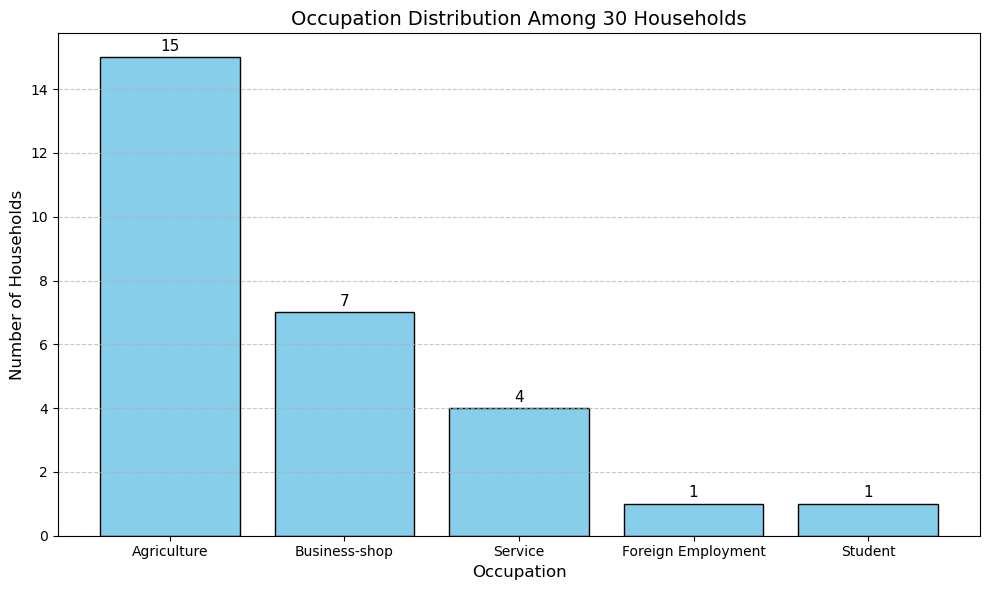

In [6]:
import matplotlib.pyplot as plt

# Occupation data and frequencies
occupations = ['Agriculture', 'Business-shop', 'Service', 'Foreign Employment', 'Student']
frequencies = [15, 7, 4, 1, 1]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(occupations, frequencies, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.title('Occupation Distribution Among 30 Households', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with frequency values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', fontsize=11)

plt.tight_layout()
plt.show()


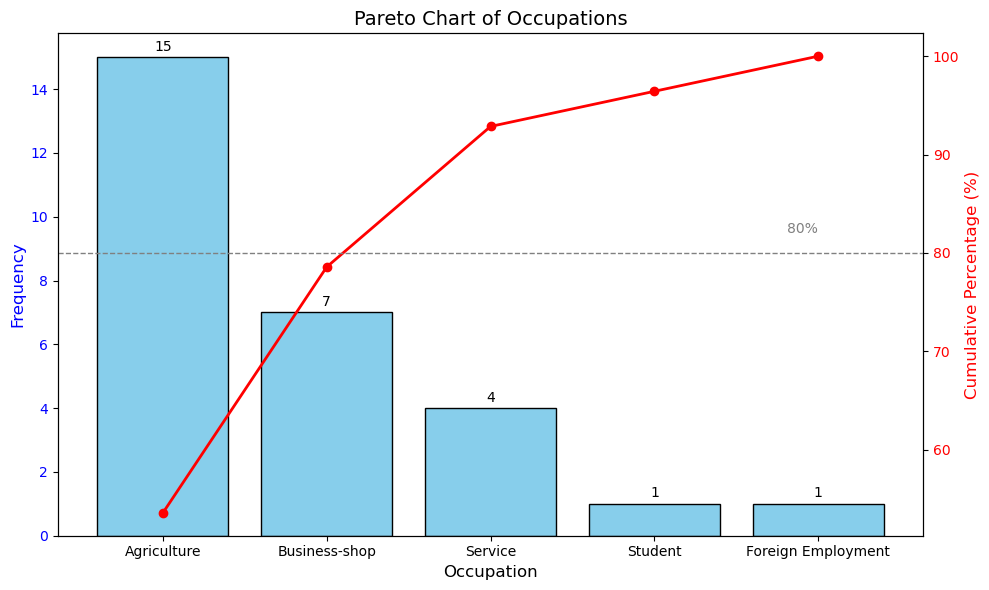

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Raw occupation data
occupations = ['Agriculture', 'Business-shop', 'Service', 'Foreign Employment', 'Student']
frequencies = [15, 7, 4, 1, 1]

# Sort data in descending order
sorted_indices = np.argsort(frequencies)[::-1]
sorted_occupations = [occupations[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

# Cumulative percentages
cum_freq = np.cumsum(sorted_frequencies)
cum_percent = cum_freq / sum(sorted_frequencies) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart (left y-axis)
bars = ax1.bar(sorted_occupations, sorted_frequencies, color='skyblue', edgecolor='black')
ax1.set_xlabel("Occupation", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate frequencies on bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', fontsize=10)

# Line graph (right y-axis)
ax2 = ax1.twinx()
ax2.plot(sorted_occupations, cum_percent, color='red', marker='o', linewidth=2)
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Horizontal line at 80% (optional, for Pareto principle)
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.text(len(sorted_occupations) - 1, 82, '80%', color='gray', ha='right', fontsize=10)

# Title and layout
plt.title("Pareto Chart of Occupations", fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import pandas as pd

# Data points
data = np.array([0.2, 3.7, 1.2, 13.7, 1.5, 0.2, 1.7,
                 0.6, 0.1, 8.9, 1.9, 5.5, 0.5, 3.1,
                 3.1, 8.9, 8.0, 12.7, 4.1, 2.6,
                 1.5, 8.0, 4.6, 0.7, 0.7, 6.6, 4.9,
                 0.1, 4.4, 3.2, 11.0, 7.9, 1.3,
                 2.4, 0.1, 2.8, 4.9, 3.5, 6.1, 0.1])

# Define class intervals [closed, open)
bins = np.arange(0, 14, 2)  # [0,2),[2,4),...,[14,16)
labels = [f"[{bins[i]}, {bins[i+1]})" for i in range(len(bins)-1)]
freq, _ = np.histogram(data, bins=bins)

# Midpoints
midpoints = (bins[:-1] + bins[1:]) / 2

# Create DataFrame
df = pd.DataFrame({
    "Class Interval": labels,
    "Midpoint": midpoints,
    "Frequency": freq,
})
df["f*x"] = df["Frequency"] * df["Midpoint"]
mean_grouped = df["f*x"].sum() / df["Frequency"].sum()

# Standard deviation
df["(x - mean)^2"] = (df["Midpoint"] - mean_grouped)**2
df["f*(x - mean)^2"] = df["Frequency"] * df["(x - mean)^2"]
sd_grouped = np.sqrt(df["f*(x - mean)^2"].sum() / df["Frequency"].sum())

# Display table to user

mean_grouped, sd_grouped


(3.6315789473684212, 2.9417239184172885)